# Time Series

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [5]:
dataset = pd.read_csv('AirPassengers.csv')
dataset

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [10]:
dateparse = lambda dates: datetime.strptime(dates,"%Y-%m")
dataset = pd.read_csv('AirPassengers.csv', 
                      parse_dates = ['Month'],
                      index_col = 'Month',
                      date_parser = dateparse)
dataset

C:\Users\ville\AppData\Local\Temp\ipykernel_17312\1017334355.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = pd.read_csv('AirPassengers.csv',


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [11]:
time_series = dataset['#Passengers']
time_series

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [12]:
time_series['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [13]:
time_series['1950-02':'1950-12']

Month
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [14]:
time_series.index.max(), time_series.index.min()

(Timestamp('1960-12-01 00:00:00'), Timestamp('1949-01-01 00:00:00'))

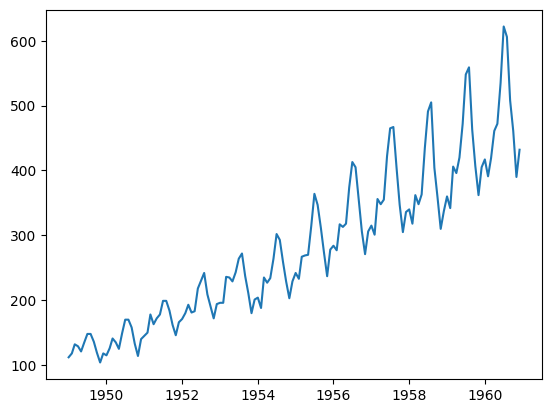

In [15]:
plt.plot(time_series)

C:\Users\ville\AppData\Local\Temp\ipykernel_17312\1512504890.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  year_time_series = time_series.resample("A").sum()


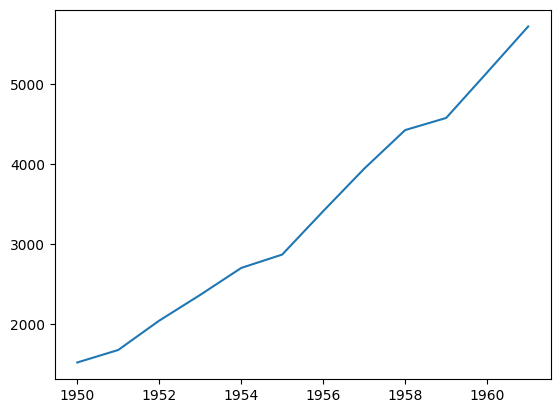

In [16]:
year_time_series = time_series.resample("A").sum()
plt.plot(year_time_series)

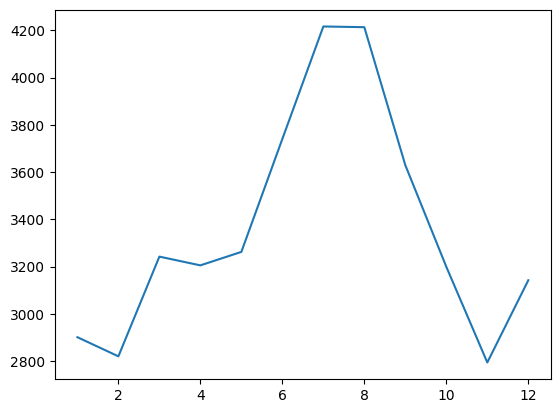

In [17]:
month_time_series = time_series.groupby([lambda x: x.month]).sum()
plt.plot(month_time_series)

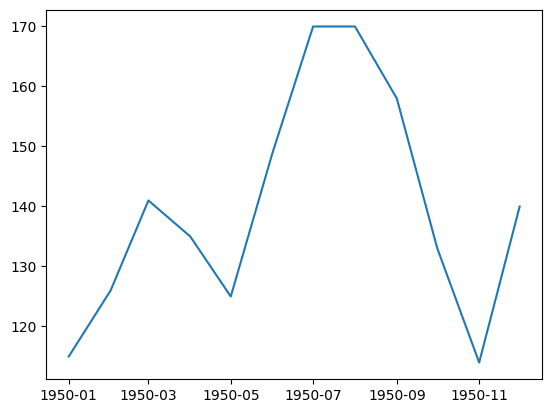

In [18]:
plt.plot(time_series['1950-01':'1950-12'])

# Decomposition

In [19]:
decomposition = seasonal_decompose(time_series)
trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid

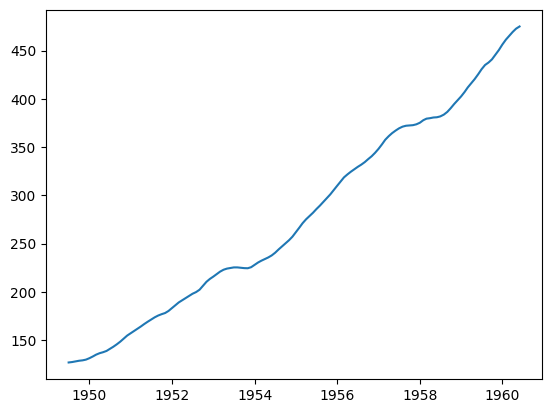

In [20]:
plt.plot(trend)

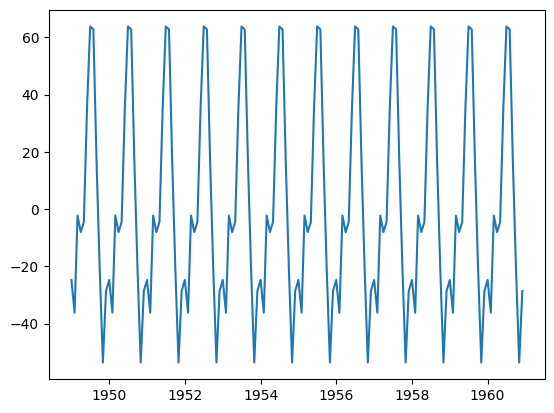

In [21]:
plt.plot(seasonal)

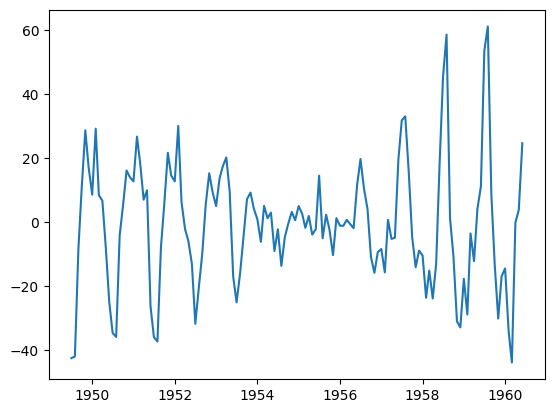

In [22]:
plt.plot(resid) #random effects

# ARIMA

In [25]:
model = auto_arima(time_series)

In [26]:
model.order

(4, 1, 3)

In [31]:
predictions = model.predict(n_periods = 24)
predictions

1961-01-01    467.573753
1961-02-01    490.494474
1961-03-01    509.136857
1961-04-01    492.554705
1961-05-01    495.305955
1961-06-01    475.947812
1961-07-01    476.339856
1961-08-01    475.552145
1961-09-01    472.353808
1961-10-01    483.889648
1961-11-01    475.570155
1961-12-01    485.921507
1962-01-01    479.133605
1962-02-01    480.987419
1962-03-01    482.221396
1962-04-01    476.211023
1962-05-01    483.942812
1962-06-01    475.847351
1962-07-01    482.794249
1962-08-01    479.011954
1962-09-01    479.518626
1962-10-01    482.449445
1962-11-01    476.973942
1962-12-01    483.511013
Freq: MS, dtype: float64

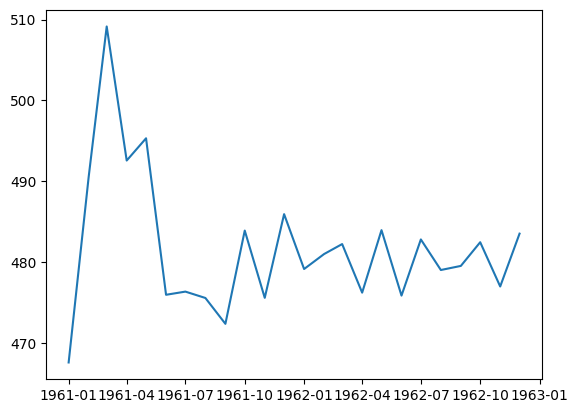

In [32]:
plt.plot(predictions)

In [34]:
len(time_series)

144

In [35]:
train = time_series[:130]
train.shape

(130,)

In [36]:
train.index.min(), train.index.max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1959-10-01 00:00:00'))

In [37]:
test = time_series[130:]
test.shape

(14,)

In [38]:
test.index.min(), test.index.max()

(Timestamp('1959-11-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [39]:
model2 = auto_arima(train, suppress_warnings=True)

In [41]:
predictions = pd.DataFrame(model2.predict(n_periods=14),index = test.index)
predictions.columns = ['passengers_predictions']
predictions

,passengers_predictions
Month,
1959-11-01,357.690515
1959-12-01,334.857456
1960-01-01,342.488598
1960-02-01,375.944535
1960-03-01,424.126291
1960-04-01,473.151449
1960-05-01,510.388386
1960-06-01,527.724250
1960-07-01,523.268339


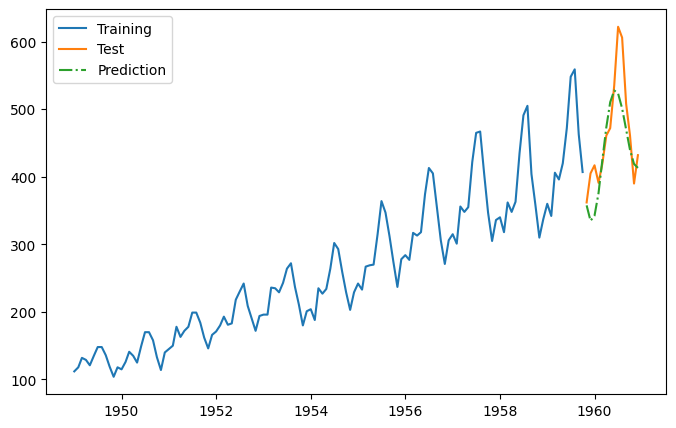

In [43]:
plt.figure(figsize=(8,5))
plt.plot(train, label = "Training")
plt.plot(test, label = "Test")
plt.plot(predictions, '-.', label = "Prediction")
plt.legend()